In [1]:
import numpy as np
n=300
sample_size=n
p=20
p1=10
k=10 # 这里k是变化的
M=5000
# 给定x0
x0=np.array([1,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05])
sigma_x=0.2

In [2]:
# 构造 n*(p+1)维自变量矩阵
import numpy as np
def get_X(p,sample_size):
    X_train = []
    for i in range(sample_size):
        x_train=[]
        x_train.append(1)
        w = np.random.normal(0, sigma_x, p)
        for j in range(p):
            x_train.append(w[j])
        X_train.append(x_train)
    X_train = np.array(X_train)
    return X_train

In [3]:
X=get_X(p,sample_size)
X.shape

(300, 21)

In [4]:
def get_beta(p,p1):
    beta=[]
    for i in range(p+1):
        if i<p1+1:
            beta.append(1)
        else:
            beta.append(0)
    return np.transpose(beta)

In [5]:
# sigma_y=3
def get_y_vector(X,beta,sample_size):
    y_vector=np.dot(X,beta)+np.random.normal(0,3,sample_size)
    return y_vector
# y_vector=get_y_vector(X,beta,sample_size)
# print(y_vector.shape) #n维的向量

In [6]:
#求最小二乘估计
def get_beta_hat_k(k,y_vector,X,p):
    X_k=X[:,:k]
    X_k_trans=np.transpose(X_k)
    tmpdot=np.dot(X_k_trans,X_k)
    tmpinverse=np.linalg.inv(tmpdot)
    tmpdot_=np.dot(tmpinverse,X_k_trans)
    beta_hat_k=np.dot(tmpdot_,y_vector)
    beta_hat_k_vector=[]
    for i in range(p+1):
        if i < len(beta_hat_k):
            beta_hat_k_vector.append(beta_hat_k[i])
        else:
            beta_hat_k_vector.append(0)
    return np.array(beta_hat_k_vector)

In [7]:
def get_expect_y0(x0,beta):
    y0=np.dot(x0,beta)
    return y0
def get_y0_hat_k(k,beta_hat_k,x0):
    y0_hat=np.dot(x0,beta_hat_k)
    return y0_hat

In [8]:
def one_iter(p,sample_size,k,x0):
    #第一步得到训练集X
    X=get_X(p,sample_size)
    #得到天眼：beta
    beta=get_beta(p,p1)
    beta=np.array(beta)
    # 由天眼构造y
    y_vector=get_y_vector(X,beta,sample_size)
    # 给定x0求y0的期望
    y0=get_expect_y0(x0,beta)
    # 求最小二乘估计
    beta_hat_k=get_beta_hat_k(k,y_vector,X,p)
    # 得到x0的预测值
    y0_hat=get_y0_hat_k(k,beta_hat_k,x0)
    return y0_hat,y0


In [9]:
def M_iter(p,sample_size,k,x0):
    y0_hat_list=[]
    for i in range(M):
        y0_hat,y0=one_iter(p,sample_size,k,x0)
        y0_hat_list.append(y0_hat)
    return y0_hat_list,y0

In [10]:
def get_bias(y0_hat_list,y0):
    y0_hat_list_mean=np.mean(y0_hat_list)
    bias=(y0_hat_list_mean-y0)**2
    return bias

In [11]:
def get_var(y0_hat_list):
    var=0
    y0_hat_list_mean=np.mean(y0_hat_list)
    for y in y0_hat_list:
        var=var+(y0_hat_list_mean)**2
    return var/len(y0_hat_list)

In [12]:
def get_mse(y0_hat_list,y0):
    mse=0
    for i in y0_hat_list:
        mse=mse+(i-y0)**2
    mse=mse/len(y0_hat_list)
    return mse

In [13]:
y0_hat_list,y0=M_iter(p,sample_size,p1,x0)

In [14]:
print(len(y0_hat_list))
print(y0)

5000
1.5000000000000002


In [15]:
bias=get_bias(y0_hat_list,y0)
var=get_var(y0_hat_list)
mse=get_mse(y0_hat_list,y0)

In [16]:
print(bias)
print(var)
print(mse)

0.0023884000971169436
2.105774618773254
0.05117232615139224


In [17]:
bias_list=[]
var_list=[]
mse_list=[]
for k in range(1,21):
    print("k = ",k)
    y0_hat_list,y0=M_iter(p,sample_size,k,x0)
    bias=get_bias(y0_hat_list,y0)
    var=get_var(y0_hat_list)
    mse=get_mse(y0_hat_list,y0)
    bias_list.append(bias)
    var_list.append(var)
    mse_list.append(mse)

k =  1
k =  2
k =  3
k =  4
k =  5
k =  6
k =  7
k =  8
k =  9
k =  10
k =  11
k =  12
k =  13
k =  14
k =  15
k =  16
k =  17
k =  18
k =  19
k =  20


In [18]:
bias_list

[0.2535135651042905,
 0.2018710093289993,
 0.15878020569964385,
 0.12102432654737015,
 0.09283014006975308,
 0.06328591637140406,
 0.037992991861702005,
 0.022771908108022428,
 0.010405703775212523,
 0.0024133937093870324,
 7.756453483111648e-06,
 0.00011807050821370757,
 6.610937360255978e-06,
 9.099350630131256e-07,
 1.1231303433160939e-07,
 2.787392584768224e-06,
 8.07737785862764e-06,
 3.2449697988565762e-06,
 1.9747428552726528e-08,
 5.198003158558041e-06]

In [19]:
var_list

[0.9930096472216986,
 1.1039692755365718,
 1.2133631858706062,
 1.3273678031037146,
 1.428788969975308,
 1.558585149615103,
 1.7032392601459811,
 1.8200609926528284,
 1.9543806492831226,
 2.1050344827874063,
 2.2583628795134087,
 2.2175199942776502,
 2.257720133883845,
 2.2471391944413375,
 2.251005506419429,
 2.2449941415414854,
 2.258534295808338,
 2.244599105057703,
 2.250421596379932,
 2.256844936918493]

In [20]:
p=np.linspace(1,20,20)
p

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
       14., 15., 16., 17., 18., 19., 20.])

Text(10, 0.05069649409256863, '[10,0.0507]')

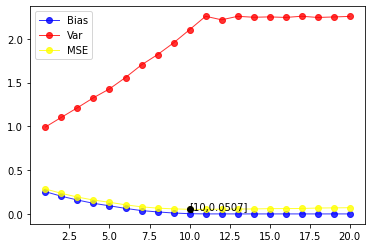

In [21]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
# plt.plot(p,bias_list)
# plt.plot(p,var_list)
# # plt.plot(p,mse_list)
plt.plot(p, bias_list, 'ro-', color='blue', alpha=0.8, linewidth=1, label="Bias")
plt.plot(p, var_list, 'ro-', color='red', alpha=0.8, linewidth=1, label='Var')
plt.plot(p, mse_list, 'ro-', color='yellow', alpha=0.8, linewidth=1, label='MSE')
MSE_min=np.argmin(np.array(mse_list))
plt.legend()
plt.plot(MSE_min,mse_list[MSE_min],'ko') 
show_min='['+str(MSE_min)+','+str(round(mse_list[MSE_min],4))+']'
plt.annotate(show_min,xy=(MSE_min,mse_list[MSE_min]),xytext=(MSE_min,mse_list[MSE_min]))